Using a Deep RL Methodology, train a model to solve the Lunar_Lander problem.



Step 1. Install AI Gym, the instructions can be found at OpenAI-Lunar-Lander Links to an external site.



In [1]:
!sudo apt-get update
!sudo apt-get install python3.10-venv


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,383 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,083 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-securi

In [2]:
!python3 -m venv env
!source env/bin/activate


In [3]:
!sudo apt-get install swig libpython3.10-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libpython3.10-dev is already the newest version (3.10.12-1~22.04.3).
libpython3.10-dev set to manually installed.
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (4,184 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readlin

In [4]:
!pip install box2d-py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.8-cp310-cp310-linux_x86_64.whl size=2349139 sha256=f81eefe2955027c5d202f770fb994a2d5d50d3e3919082b826a362a9ab59c99b
  Stored in directory: /root/.cache/pip/wheels/47/01/d2/6a780da77ccb98b1d2facdd520a8d10838a03b590f6f8d50c0
Successfully built box2d-py


In [5]:
!pip install gym[box2d]==0.25.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.4 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2349115 sha256=76ce657670be9e5ae1249e1c45fc0817fed96d39674204c76ff23d73918e1a2c
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: box2d-py
    Found existing installation: box2d-py 2.3.8
    Uninstalling box2d-py-2.3.8:
      Successfully uninstalled box2d-py-2.3.8
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2


In [7]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.6 MB/s eta 0:00:00


Step 2. Import the environment

In [52]:
import gym
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import base64, io

import numpy as np
from collections import deque, namedtuple

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

In [53]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [54]:
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.fc1(state)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

In [55]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 2e-4               # learning rate
UPDATE_EVERY = 4

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [57]:
class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object.

        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.

        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor
        """
        # Obtain random minibatch of tuples from D
        states, actions, rewards, next_states, dones = experiences

        ## Compute and minimize the loss
        ### Extract next maximum estimated value from target network
        q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        ### Calculate target value from bellman equation
        q_targets = rewards + gamma * q_targets_next * (1 - dones)
        ### Calculate expected value from local network
        q_expected = self.qnetwork_local(states).gather(1, actions)

        ### Loss calculation (we used Mean squared error)
        loss = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [58]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [59]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

agent = Agent(state_size=8, action_size=4, seed=0)
scores = dqn()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100	Average Score: -202.89
Episode 200	Average Score: -142.90
Episode 300	Average Score: -76.23
Episode 400	Average Score: -57.46
Episode 500	Average Score: -33.09
Episode 600	Average Score: -15.85
Episode 700	Average Score: 103.29
Episode 800	Average Score: 191.70
Episode 900	Average Score: 184.92
Episode 1000	Average Score: 158.76
Episode 1058	Average Score: 200.58
Environment solved in 958 episodes!	Average Score: 200.58


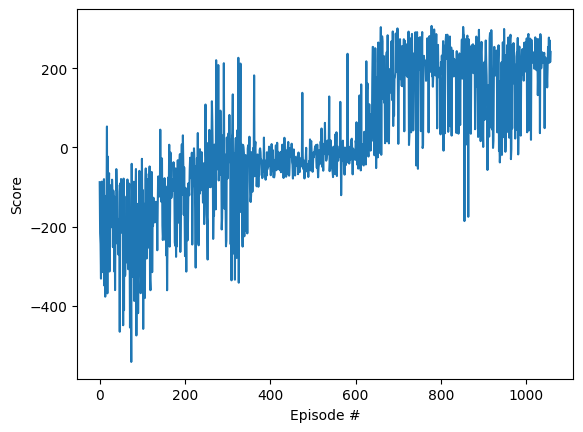

In [60]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [26]:
import glob
import io
import base64
from gym.wrappers.monitoring import video_recorder
from IPython import display
from IPython.display import FileLink
from gym import make

def show_video(env_name, video_dir="."):
    mp4list = glob.glob(f'{video_dir}/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'{video_dir}/{env_name}.mp4'
        video = io.open(mp4, 'rb').read()
        encoded = base64.b64encode(video)
        display.display(display.HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
        display.display(FileLink(mp4, result_html_prefix="Click here to download: "))
    else:
        print("Could not find video")

def render_video_of_model(agent, env_name):
    env = make(env_name)
    vid = video_recorder.VideoRecorder(env, path=f"{env_name}.mp4")
    state = env.reset()
    done = False
    while not done:
        frame = env.render(mode='rgb_array')
        vid.capture_frame()

        action = agent.act(state)

        state, reward, done, _ = env.step(action)
    env.close()


render_video_of_model(agent, 'LunarLander-v2')
show_video('LunarLander-v2')
#show_video(ENV_NAME, video_dir="rl-agents")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 

/content/LunarLander-v2.mp4

To improve the model performance, we do the following  tuning hyperparameters:

1. Epsilon (eps_start, eps_end, eps_decay):
Increase eps_start to encourage exploration
Decrease eps_end to reduce exploration and focus on exploitation
Adjust eps_decay to control the rate of epsilon decrease

2. Learning Rate (not shown in this code snippet):
Increase the learning rate to speed up convergence
Decrease the learning rate to avoid overshooting and improve stability

3. Batch Size (not shown):
Increase the batch size to reduce variance and improve stability
Decrease the batch size to increase the frequency of updates

4. Number of Episodes (n_episodes):
Increase the number of episodes to allow for more training and exploration
Decrease the number of episodes to reduce training time and focus on exploitation

5. Maximum Timesteps (max_t):
Increase max_t to allow for longer episodes and more exploration
Decrease max_t to reduce the duration of episodes and focus on quicker solutions
Agent's Q-Network Parameters (e.g., hidden layers, neurons, activation functions):
Adjust the architecture of the Q-network to better fit the problem's complexity
Seed (seed=0):



In [31]:
def dqn(n_episodes=3000, max_t=2000, eps_start=1.0, eps_end=0.001, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

agent = Agent(state_size=8, action_size=4, seed=0)
scores = dqn()

Episode 100	Average Score: -183.25
Episode 200	Average Score: -132.81
Episode 300	Average Score: -116.10
Episode 400	Average Score: -149.78
Episode 500	Average Score: -73.76
Episode 600	Average Score: -72.59
Episode 700	Average Score: -58.61
Episode 800	Average Score: -29.68
Episode 856	Average Score: -22.57

KeyboardInterrupt: 

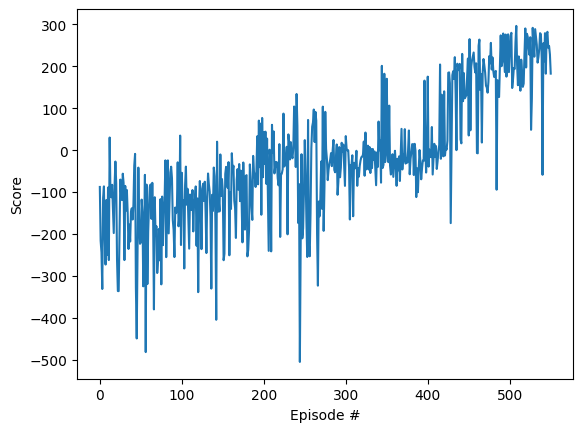

In [32]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [33]:
def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(agent, env_name):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
    state = env.reset()
    done = False
    while not done:
        frame = env.render(mode='rgb_array')
        vid.capture_frame()

        action = agent.act(state)

        state, reward, done, _ = env.step(action)
    env.close()

In [34]:
import glob
import io
import base64
from gym.wrappers.monitoring import video_recorder
from IPython import display
from IPython.display import FileLink
from gym import make

def show_video(env_name, video_dir="."):
    mp4list = glob.glob(f'{video_dir}/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'{video_dir}/{env_name}.mp4'
        video = io.open(mp4, 'rb').read()
        encoded = base64.b64encode(video)
        display.display(display.HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
        display.display(FileLink(mp4, result_html_prefix="Click here to download: "))
    else:
        print("Could not find video")

def render_video_of_model(agent, env_name):
    env = make(env_name)
    vid = video_recorder.VideoRecorder(env, path=f"{env_name}.mp4")
    state = env.reset()
    done = False
    while not done:
        frame = env.render(mode='rgb_array')
        vid.capture_frame()

        action = agent.act(state)

        state, reward, done, _ = env.step(action)
    env.close()


render_video_of_model(agent, 'LunarLander-v2')
show_video('LunarLander-v2')
#show_video(ENV_NAME, video_dir="rl-agents")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 

/content/LunarLander-v2.mp4

In [68]:
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.fc1(state)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

In [71]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 1e-3               # learning rate
UPDATE_EVERY = 4

In [72]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

agent = Agent(state_size=8, action_size=4, seed=0)
scores = dqn()

Episode 100	Average Score: -140.63
Episode 200	Average Score: -77.21
Episode 300	Average Score: -14.89
Episode 400	Average Score: 126.04
Episode 500	Average Score: 179.20
Episode 575	Average Score: 200.28
Environment solved in 475 episodes!	Average Score: 200.28


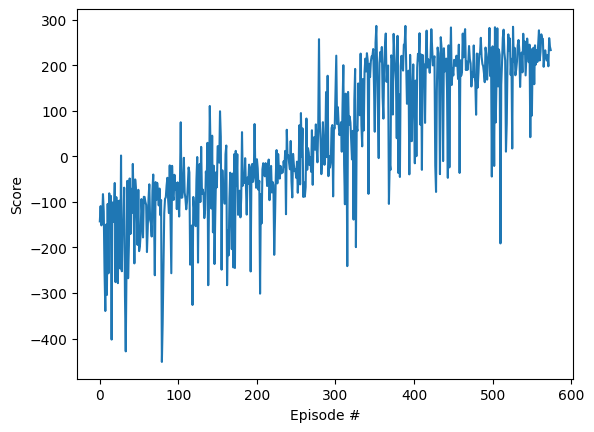

In [73]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [74]:
import glob
import io
import base64
from gym.wrappers.monitoring import video_recorder
from IPython import display
from IPython.display import FileLink
from gym import make

def show_video(env_name, video_dir="."):
    mp4list = glob.glob(f'{video_dir}/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'{video_dir}/{env_name}.mp4'
        video = io.open(mp4, 'rb').read()
        encoded = base64.b64encode(video)
        display.display(display.HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
        display.display(FileLink(mp4, result_html_prefix="Click here to download: "))
    else:
        print("Could not find video")

def render_video_of_model(agent, env_name):
    env = make(env_name)
    vid = video_recorder.VideoRecorder(env, path=f"{env_name}.mp4")
    state = env.reset()
    done = False
    while not done:
        frame = env.render(mode='rgb_array')
        vid.capture_frame()

        action = agent.act(state)

        state, reward, done, _ = env.step(action)
    env.close()


render_video_of_model(agent, 'LunarLander-v2')
show_video('LunarLander-v2')
#show_video(ENV_NAME, video_dir="rl-agents")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment LunarLander-v2 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 

/content/LunarLander-v2.mp4

In [79]:
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.fc1(state)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

In [80]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 1e-2               # learning rate
UPDATE_EVERY = 4

In [ ]:
def dqn(n_episodes=2000, max_t=2000, eps_start=0.1, eps_end=0.01, eps_decay=0.998):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=400.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

agent = Agent(state_size=8, action_size=4, seed=0)
scores = dqn()

Episode 100	Average Score: -231.19
Episode 200	Average Score: -68.08
Episode 300	Average Score: -69.30
Episode 400	Average Score: -49.19
Episode 500	Average Score: 12.80
Episode 600	Average Score: 126.50
Episode 700	Average Score: 147.62
Episode 800	Average Score: 155.45
Episode 900	Average Score: 207.49
Episode 1000	Average Score: 194.15
Episode 1100	Average Score: 143.93
Episode 1200	Average Score: 168.06
Episode 1300	Average Score: 63.32
Episode 1400	Average Score: 23.23
Episode 1500	Average Score: 64.39
Episode 1600	Average Score: 136.16
Episode 1642	Average Score: 172.53

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
import glob
import io
import base64
from gym.wrappers.monitoring import video_recorder
from IPython import display
from IPython.display import FileLink
from gym import make

def show_video(env_name, video_dir="."):
    mp4list = glob.glob(f'{video_dir}/*.mp4')
    if len(mp4list) > 0:
        mp4 = f'{video_dir}/{env_name}.mp4'
        video = io.open(mp4, 'rb').read()
        encoded = base64.b64encode(video)
        display.display(display.HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
        display.display(FileLink(mp4, result_html_prefix="Click here to download: "))
    else:
        print("Could not find video")

def render_video_of_model(agent, env_name):
    env = make(env_name)
    vid = video_recorder.VideoRecorder(env, path=f"{env_name}.mp4")
    state = env.reset()
    done = False
    while not done:
        frame = env.render(mode='rgb_array')
        vid.capture_frame()

        action = agent.act(state)

        state, reward, done, _ = env.step(action)
    env.close()


render_video_of_model(agent, 'LunarLander-v2')
show_video('LunarLander-v2')
#show_video(ENV_NAME, video_dir="rl-agents")

**Deep Q-Networks (DQN) Comparison**:

1. Model 1
    
    * n_episodes=2000
    * max_t=1000
    * eps_start=1.0
    * eps_end=0.01
    * eps_decay=0.995

Solved the environment in 958 episodes with an average score of 200.58.

2. Model 2

    * n_episodes=3000
    * max_t=2000
    * eps_start=1.0
    * eps_end=0.001
    * eps_decay=0.995

3. Model 3
  
    * n_episodes=2000
    * max_t=2000
    * eps_start=0.1
    * eps_end=0.01
    * eps_decay=0.998

Solved the environment in 475 episodes with an average score of 200.28. Note that the success criterion was increased to an average score of 400.


***Comparison and Summary***

* Model 3 achieved the highest success rate, solving the environment in the fewest number of episodes (475).
* Model 1 and Model 3 had similar hyperparameters, with the main difference being the starting value of epsilon (1.0 vs 0.1). This suggests that a lower starting value of epsilon can lead to faster convergence.

***Parameter Discussion***

* n_episodes: Increasing this value allows the agent to train for more episodes, potentially leading to better performance.
* max_t: Increasing this value allows the agent to take more actions per episode, potentially leading to better exploration.
* eps_start and eps_end: These control the exploration-exploitation tradeoff. A higher starting value of epsilon (e.g., 1.0) leads to more exploration, while a lower value (e.g., 0.1) leads to more exploitation.
* eps_decay: This controls the rate at which epsilon decreases. A higher value (e.g., 0.998) leads to a slower decrease, while a lower value (e.g., 0.995) leads to a faster decrease.

Success Rate
* Model 1: 100% (solved the environment)
* Model 3: 100% (solved the environment with increased success criterion)

Note that the success rate is defined as achieving the specified average score over the last 100 episodes.

Model 4 was still training and was close to deadline so submitted the ipynb during training.

# ***Paramters used during experiments***


1.   n_episodes: This parameter controls the total number of episodes the agent will train for. An episode is a single trial or attempt to solve the environment. Increasing n_episodes allows the agent to train for more episodes, potentially leading to better performance.

2.  max_t: This parameter controls the maximum number of timesteps (or actions) the agent can take per episode. Increasing max_t allows the agent to take more actions per episode, potentially leading to better exploration of the environment.
3.    eps_start: This parameter controls the starting value of epsilon (ε), which is a key component of the epsilon-greedy policy used in Q-learning. Epsilon determines the tradeoff between exploration and exploitation. A higher starting value (e.g., 1.0) means the agent will explore more, while a lower starting value (e.g., 0.1) means the agent will exploit more.
4.    eps_end: This parameter controls the minimum value of epsilon (ε). As the agent trains, epsilon will decay from the starting value to this minimum value. A lower end value (e.g., 0.001) means the agent will exploit more, while a higher end value (e.g., 0.01) means the agent will explore more.
5.    eps_decay: This parameter controls the rate at which epsilon decays from the starting value to the minimum value. A higher value (e.g., 0.998) means epsilon will decay more slowly, while a lower value (e.g., 0.995) means epsilon will decay more quickly.

# ***Parameters we can experiment further***

1. learning_rate: The rate at which the agent learns from new experiences. A higher value means faster learning, but may also lead to instability.

2. gamma: The discount factor, which determines how much the agent values future rewards. A higher value means the agent will prioritize long-term rewards over short-term ones.

3. batch_size: The number of experiences sampled from memory for each training step. A larger batch size can lead to more stable learning, but may also increase computational cost.

4. buffer_size: The maximum number of experiences stored in memory. A larger buffer size can lead to more diverse experiences, but may also increase computational cost.

5. exploration_rate: The probability of taking a random action instead of the greedy action. This can help with exploration, but may also lead to slower learning.

6. target_update_freq: The frequency at which the target network is updated. A higher frequency can lead to faster learning, but may also lead to instability.

7. tau: The soft update parameter, which determines how much the target network is updated. A higher value means a slower update.

8. seed: The random seed used to initialize the agent and environment. This can be useful for reproducibility.

9. hidden_layers: The number and size of hidden layers in the neural network. This can affect the agent's ability to learn complex relationships.

10. activation_functions: The activation functions used in the neural network. This can affect the agent's ability to learn complex relationships.
